In [1]:
import torch
import torchvision.models as models

In [3]:
my_alexnet = models.AlexNet()

In [4]:
print(my_alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [5]:
import ptflops

In [6]:
ptflops.get_model_complexity_info(my_alexnet,(3,224,224))

AlexNet(
  61.1 M, 100.000% Params, 715.56 MMac, 100.000% MACs, 
  (features): Sequential(
    2.47 M, 4.042% Params, 656.91 MMac, 91.804% MACs, 
    (0): Conv2d(23.3 k, 0.038% Params, 70.47 MMac, 9.848% MACs, 3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(0, 0.000% Params, 193.6 KMac, 0.027% MACs, inplace=True)
    (2): MaxPool2d(0, 0.000% Params, 193.6 KMac, 0.027% MACs, kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(307.39 k, 0.503% Params, 224.09 MMac, 31.316% MACs, 64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(0, 0.000% Params, 139.97 KMac, 0.020% MACs, inplace=True)
    (5): MaxPool2d(0, 0.000% Params, 139.97 KMac, 0.020% MACs, kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(663.94 k, 1.087% Params, 112.21 MMac, 15.681% MACs, 192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(0, 0.000% Params, 64.9 KMac, 0.009% MACs, inplace=True)
    (

('715.56 MMac', '61.1 M')

In [7]:
my_vgg11 = models.vgg11(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg11-bbd30ac9.pth" to C:\Users\23197/.cache\torch\hub\checkpoints\vgg11-bbd30ac9.pth


  0%|          | 0.00/507M [00:00<?, ?B/s]

In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [103]:
#sample y (x1, x2)
# loss function J = (x1,x2)
# gradient!
def f(x):
    return x[0]**2 + 50*x[1]**2

def g(x):
    return np.array([2*x[0] , 100*x[1]])
#上帝视角每一处的梯度！

In [104]:
x = np.linspace(-200,200,1000)
y = np.linspace(-200,200,1000)
X,Y = np.meshgrid(x,y) 
Z = X**2 + 50*Y**2

def contour(X,Y,Z, res = None):
    plt.contour(X,Y,Z)
    plt.plot(0,0,marker = '*')

    if res is not None:
        res = np.array(res)
        #print(res)
        for i in range(len(res) - 1):
            plt.plot(res[i:i+2,0],res[i:i+2,1])
            print(res[i:i+2,0], res[i:i+2,1])

            

[100  50] [100  50]
[50 20] [50 29]


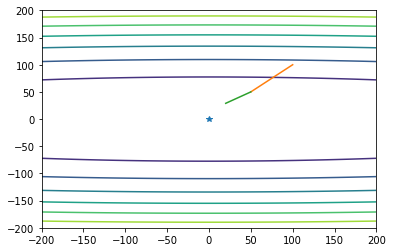

In [105]:
contour(X,Y,Z,res = [[100,100],[50,50],[20,29]])

In [106]:
#traditional gradient descent
def gd(x_start,step, epoch,g,printf):
    x = np.array(x_start,dtype = 'float64')
    passing_dot = [x.copy()]
    for i in range(epoch-1):
        grad = g(x)
        x = x - step * grad
        passing_dot.append(x.copy())
        if  printf:
            print(f'Epoch= {i+1} grad = {grad} x = {x}')
    return x, passing_dot


[150.  145.5] [ 75.  -37.5]
[145.5   141.135] [-37.5   18.75]
[141.135   136.90095] [18.75  -9.375]
[136.90095   132.7939215] [-9.375   4.6875]
[132.7939215  128.81010385] [ 4.6875  -2.34375]
[128.81010385 124.94580074] [-2.34375   1.171875]
[124.94580074 121.19742672] [ 1.171875  -0.5859375]
[121.19742672 117.56150392] [-0.5859375   0.29296875]
[117.56150392 114.0346588 ] [ 0.29296875 -0.14648438]
[114.0346588  110.61361903] [-0.14648438  0.07324219]
[110.61361903 107.29521046] [ 0.07324219 -0.03662109]
[107.29521046 104.07635415] [-0.03662109  0.01831055]
[104.07635415 100.95406352] [ 0.01831055 -0.00915527]
[100.95406352  97.92544162] [-0.00915527  0.00457764]
[97.92544162 94.98767837] [ 0.00457764 -0.00228882]
[94.98767837 92.13804802] [-0.00228882  0.00114441]
[92.13804802 89.37390658] [ 0.00114441 -0.0005722 ]
[89.37390658 86.69268938] [-0.0005722  0.0002861]
[86.69268938 84.0919087 ] [ 0.0002861  -0.00014305]
[84.0919087  81.56915144] [-1.43051147e-04  7.15255737e-05]
[81.569151

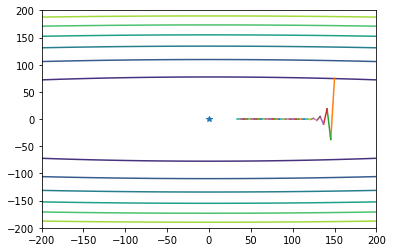

In [112]:
result, res = gd(x_start=[150,75],step = 0.015,epoch= 50, g=g,printf=False)
contour(X,Y,Z,res)

In [113]:
#gradient descent with momentum
def gd_m(x_start,step, epoch,g,printf,discount):
    x = np.array(x_start,dtype = 'float64')
    passing_dot = [x.copy()]
    pre_grad = np.zeros_like(x)
    for i in range(epoch):
        grad = g(x)
        pre_grad = pre_grad * discount + grad
        x = x - step * pre_grad
        passing_dot.append(x.copy())
        if  printf:
            print(f'Epoch {i+1} grad = {grad} x = {x}')
    return x, passing_dot

[150.  148.5] [75.  37.5]
[148.5   145.665] [ 37.5 -15. ]
[145.665   141.65685] [-15.   -54.75]
[141.65685   136.6329465] [-54.75 -63.15]
[136.6329465  130.74510388] [-63.15  -39.135]
[130.74510388 124.13859449] [-39.135   2.046]
[124.13859449 116.95135009] [ 2.046  38.0859]
[116.95135009 109.31331664] [38.0859  51.47886]
[109.31331664 101.34595336] [51.47886  37.793094]
[101.34595336  93.16186687] [37.793094   6.5793576]


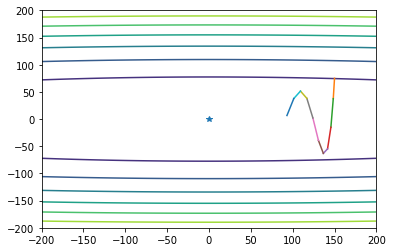

In [114]:
result, res = gd_m(x_start=[150,75],step = 0.005,epoch= 10, g=g,printf=False,discount=0.9)
contour(X,Y,Z,res)

In [115]:
#Nesterov AG
def gd_n(x_start,step, epoch,g,printf,discount):
    x = np.array(x_start,dtype = 'float64')
    passing_dot = [x.copy()]
    pre_grad = np.zeros_like(x)
    for i in range(epoch):
        x_future = x - step *discount * pre_grad
        grad = g(x_future)
        pre_grad = pre_grad * discount + grad
        x = x - step * pre_grad
        passing_dot.append(x.copy())
        if  printf:
            print(f'Epoch {i+1} grad = {grad} x = {x}')
    return x, passing_dot

[150.  146.4] [ 75. -15.]
[146.4     139.72416] [-15.   19.2]
[139.72416   130.5067223] [19.2   -9.996]
[130.5067223 119.2779637] [-9.996    7.25448]
[119.2779637  106.55195101] [ 7.25448   -4.5559824]
[106.55195101  92.81617464] [-4.5559824   3.03707971]
[92.81617464 78.52308048] [ 3.03707971 -1.97416712]
[78.52308048 64.08347264] [-1.97416712  1.29685785]
[64.08347264 49.86171778] [ 1.29685785 -0.84815607]
[49.86171778 36.17264707] [-0.84815607  0.55573372]
[36.17264707 23.28002384] [ 0.55573372 -0.36384691]
[23.28002384 11.39642302] [-0.36384691  0.23829389]
[11.39642302  0.6843539 ] [ 0.23829389 -0.15604412]
[ 0.6843539 -8.7415521] [-0.15604412  0.10218967]
[ -8.7415521  -16.81147068] [ 0.10218967 -0.06692002]
[-16.81147068 -23.49661187] [-0.06692002  0.04382375]
[-23.49661187 -28.8049212 ] [ 0.04382375 -0.02869863]
[-28.8049212  -32.77642201] [-0.02869863  0.01879375]
[-32.77642201 -35.4783542 ] [ 0.01879375 -0.01230738]
[-35.4783542  -37.00025093] [-0.01230738  0.00805968]


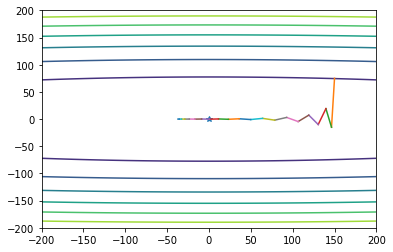

In [129]:
result, res = gd_n(x_start=[150,75],step = 0.012,epoch= 20, g=g,printf=False,discount=0.9)
contour(X,Y,Z,res)

In [130]:
#RMSPROP/Adagrad
# not discover momentum
def gd_rmsprop(x_start,step, epoch,g,printf,decay_rate):
    x = np.array(x_start,dtype = 'float64')
    passing_dot = [x.copy()]
    cache = np.array([0,0])
    pre_grad = np.zeros_like(x)
    for i in range(epoch-1):

        cache = decay_rate * cache + (1-decay_rate)*g(x)**2
        x = x - step * g(x) / np.sqrt(cache+1e-8)
        passing_dot.append(x.copy())
        grad = g(x)

        if  printf:
            print(f'Epoch {i+1} grad = {grad} x = {x}')
    return x, passing_dot


[150. 140.] [75. 65.]
[140.         133.15851112] [65.         58.43191371]
[133.15851112 127.68514933] [58.43191371 53.32866081]
[127.68514933 123.0196063 ] [53.32866081 49.08913774]
[123.0196063  118.90254087] [49.08913774 45.43779385]
[118.90254087 115.18917237] [45.43779385 42.22150259]
[115.18917237 111.78905865] [42.22150259 39.34478707]
[111.78905865 108.64127226] [39.34478707 36.74333195]
[108.64127226 105.70247582] [36.74333195 34.37132839]
[105.70247582 102.94055095] [34.37132839 32.19473945]
[102.94055095 100.33091581] [32.19473945 30.18741918]
[100.33091581  97.85426326] [30.18741918 28.32873461]
[97.85426326 95.49510278] [28.32873461 26.6020358 ]
[95.49510278 93.2407825 ] [26.6020358  24.99363149]
[93.2407825  91.08081143] [24.99363149 23.49208024]
[91.08081143 89.00637638] [23.49208024 22.08768603]
[89.00637638 87.00998932] [22.08768603 20.77213063]
[87.00998932 85.08522461] [20.77213063 19.53820016]
[85.08522461 83.22651962] [19.53820016 18.37957792]
[83.22651962 81.4290

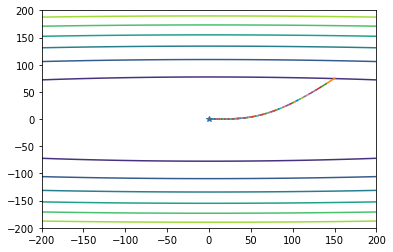

In [136]:
result, res = gd_rmsprop(x_start=[150,75], step = 1,
                         epoch = 1000,g = g,printf=False,decay_rate=0.99)
contour(X,Y,Z,res)

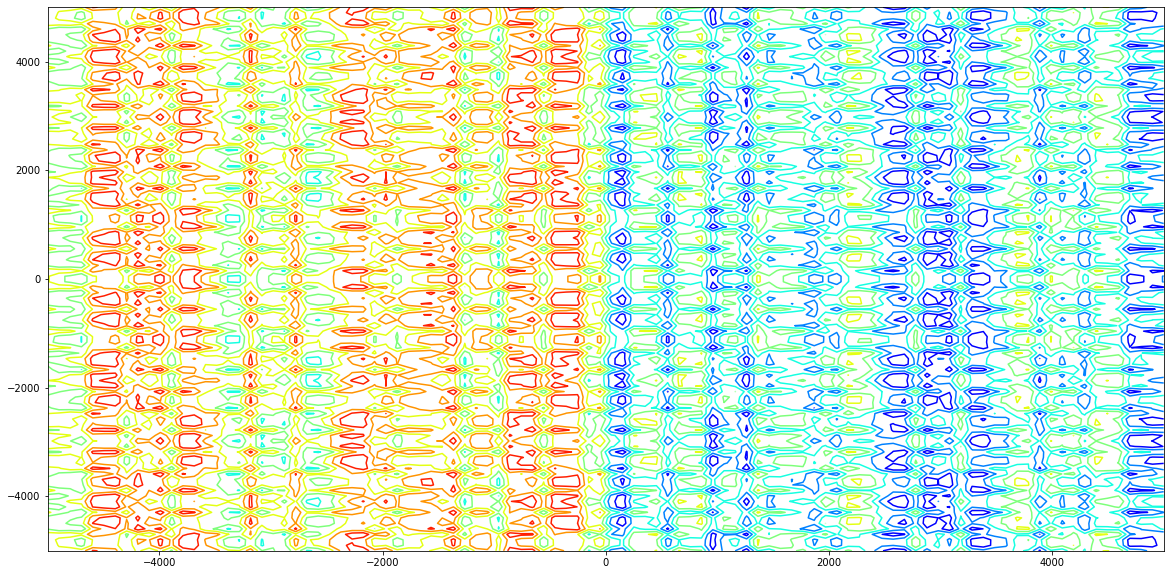

In [153]:
x = np.linspace(-5000,5000,100)
y = np.linspace(-5000,5000,100)
X,Y = np.meshgrid(x,y) 
Z = np.sin(X**2)-np.tanh(X) + np.cos(X+Y**2)

plt.figure(figsize=(20,10))
plt.contour(X,Y,Z,cmap = "jet")